In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('totalData.csv')
df

C:\Users\annab\AppData\Local\Temp\ipykernel_10332\3020583216.py:1: DtypeWarning: Columns (4,74,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('totalData.csv')


,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,RanchoSoutheast,RanchoSoutheast,NaN,True,NaN,NaN,True,1250.0,543227709,pat@patowen.com,...,0.0,False,0.0,Menifee Union,92587,0.0,12197.00,NaN,True,True
1,BeverlyHillsGreaterLA,BeverlyHillsGreaterLA,NaN,True,NaN,NaN,NaN,2100000.0,531525691,andrew@epicpropertygroup.com,...,NaN,False,NaN,NaN,91206,NaN,437284.00,NaN,False,False
2,JoshuaTreeGateway,JoshuaTreeGateway,NaN,True,NaN,NaN,NaN,179000.0,531017430,bryan@jtmodern.com,...,NaN,False,NaN,NaN,92252,0.0,875556.00,NaN,True,True
3,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,14500.0,530411639,trustdee@aol.com,...,NaN,False,NaN,NaN,92345,NaN,871200.00,NaN,True,True
4,Southland,Southland,NaN,True,NaN,NaN,NaN,720000.0,526412917,karen@goldenoakrealty.com,...,NaN,False,NaN,NaN,93510,0.0,2576054.00,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139941,OrangeCounty,OrangeCounty,"Carpet,Wood",True,NaN,NaN,False,2650000.0,1016328426,erin.oconnor.re@gmail.com,...,3.0,True,2.0,Santa Ana Unified,92660,1231.0,NaN,NaN,NaN,NaN
139942,NorthSanLuisObispo,NorthSanLuisObispo,NaN,True,NaN,NaN,NaN,125000.0,1014940572,jimclaassen@gmail.com,...,NaN,False,NaN,NaN,93422,0.0,101407.68,NaN,NaN,NaN
139943,LakeCounty,LakeCounty,NaN,True,NaN,NaN,NaN,14999.0,1014478574,veracrabtreerealty@gmail.com,...,NaN,False,NaN,NaN,95422,0.0,5929.00,NaN,NaN,NaN
139944,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,139900.0,1013494301,kim.hdrealtysource@hotmail.com,...,NaN,False,NaN,NaN,92301,NaN,3323628.00,NaN,NaN,NaN


In [3]:
features = ['PropertyType', 'ClosePrice']
drop_columns = df.columns.difference(features)
df = df.drop(columns = drop_columns)
df

,ClosePrice,PropertyType
0,1250.0,ResidentialLease
1,1100000.0,Land
2,90000.0,Land
3,14500.0,Land
4,375000.0,Land
...,...,...
139941,2650000.0,Residential
139942,90000.0,Land
139943,8000.0,Land
139944,140000.0,Land


In [4]:
df["PropertyType"] = df["PropertyType"].astype("category").cat.codes
df["ClosePrice"] = np.log1p(df["ClosePrice"])

In [5]:
X = df['PropertyType']
Y = df['ClosePrice']

In [6]:
X.shape, Y.shape

((139946,), (139946,))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((111956,), (111956,), (27990,), (27990,))

In [9]:
Y_train = Y_train.dropna()
X_train = X_train.drop(1)

In [10]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((111955,), (111955,), (27990,), (27990,))

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()

In [13]:
X_train = X_train.to_frame()

In [14]:
model.fit(X_train, Y_train)

LinearRegression()

In [15]:
X_test = X_test.to_frame()

In [16]:
Y_pred = model.predict(X_test)

In [17]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE):', mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2):', r2_score(Y_test, Y_pred))

Coefficients: [-1.44775328]
Intercept: 20.11357349301189
Mean squared error (MSE): 3.305439552833983
Coefficient of determination (R^2): 0.41187603725873234


In [18]:
np.array(Y_test)

array([10.91510665, 13.52782982, 14.88366398, ..., 13.55414709,
       13.82347972,  8.29429961])

In [19]:
Y_pred

array([15.77031365, 12.87480709, 12.87480709, ..., 12.87480709,
       12.87480709,  9.97930053])

<Axes: xlabel='ClosePrice'>

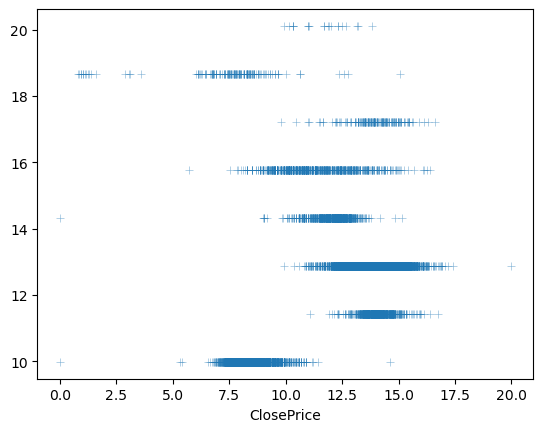

In [28]:
# comparing actual data vs. test data... doesn't look like the prediction was that good...
sns.scatterplot(x=Y_test, y=Y_pred, marker = '+', alpha = 0.5)